Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [126]:
NICKNAME = "agentWSS"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [104]:
import math

def error(M1, dM1, M2, dM2, r, dr):
    G = 6.67384 * (10 ** -11)
    mean = G * M1 * M2 / r**2
    std_dev = math.sqrt((G * dM1 * M2 / r**2)**2 + (G * M1 * dM2 / r**2)**2 + (2 * G * M1 * M2 * dr / r**3)**2)
    return mean, std_dev

print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639264)


In [92]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639265)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

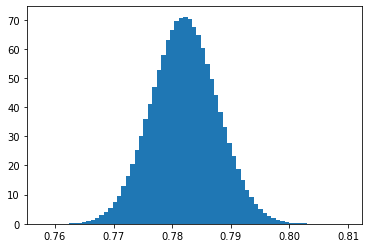

In [116]:
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6, range = None):
    G = 6.67384 * (10 ** -11)
    M1_values = np.random.normal(M1, dM1, n)
    M2_values = np.random.normal(M2, dM2, n)
    r_values = np.random.normal(r, dr, n)
    F_values = G * M1_values * M2_values / r_values**2
    if range:
        F_values = F_values[np.where((F_values>range[0]) & (F_values<range[1]))]
    plt.hist(F_values, density=True, bins = 69)

MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)

# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

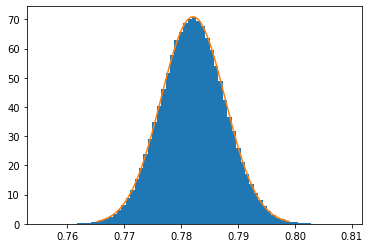

In [122]:
from scipy.stats import norm

def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6, range=None):
    G = 6.67384 * (10 ** -11)
    M1_values = np.random.normal(M1, dM1, n)
    M2_values = np.random.normal(M2, dM2, n)
    r_values = np.random.normal(r, dr, n)
    F_values = G * M1_values * M2_values / r_values**2
    plt.subplot(1, 1, 1)
    plt.hist(F_values, density=True, bins=69)
    plt.plot(x, norm.pdf(x, mean, std_dev))
    plt.show()
    
mean, std_dev = error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 69)

MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01, range=None)

Из построенных графиков видно, что распределение силы, моделируемое методом Монте-Карло, хорошо согласуется с графиком гауссовой плотности вероятности, поэтому можно сделать вывод о том, что оба подхода согласованы. Это говорит о том, что метод Монте-Карло хорошо приближает реальное распределение силы в системе.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

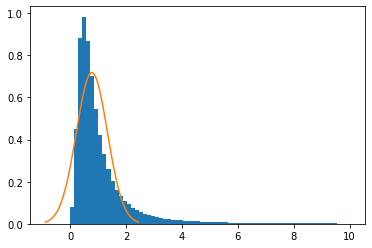

In [125]:
from scipy.stats import norm

def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6, range=(None)):
    G = 6.67384 * (10 ** -11)
    M1_values = np.random.normal(M1, dM1, n)
    M2_values = np.random.normal(M2, dM2, n)
    r_values = np.random.normal(r, dr, n)
    F_values = G * M1_values * M2_values / r_values**2
    if range:
        F_values = F_values[np.where((F_values>range[0]) & (F_values<range[1]))]

    plt.subplot(1, 1, 1)
    plt.hist(F_values, density=True, bins=69)
    plt.plot(x, norm.pdf(x, mean, std_dev))
    plt.show()
    
mean, std_dev = error(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 69)

MonteCarloNormal(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1, range=(0, 10))

# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

В этом случае метод Монте-Карло является более точным, поскольку он учитывает большее количество случайных реализаций входных параметров. В рассмотренном случае использование метода Монте-Карло позволяет учесть более широкую вариацию значений входных параметров, что снижает статистическую ошибку.

Одним из главных преимуществ метода Монте-Карло является то, что он может быть использован для анализа сложных систем, в которых сложно вычислить аналитические результаты. Он может быть также использован для оценки статистических характеристик, таких как среднее, медиана, мода и стандартное отклонение, не требуя предварительной оценки функции распределения.